In [38]:
import warnings
warnings.filterwarnings(action = 'ignore')
import requests
from bs4 import BeautifulSoup
from datetime import datetime as dt
import json

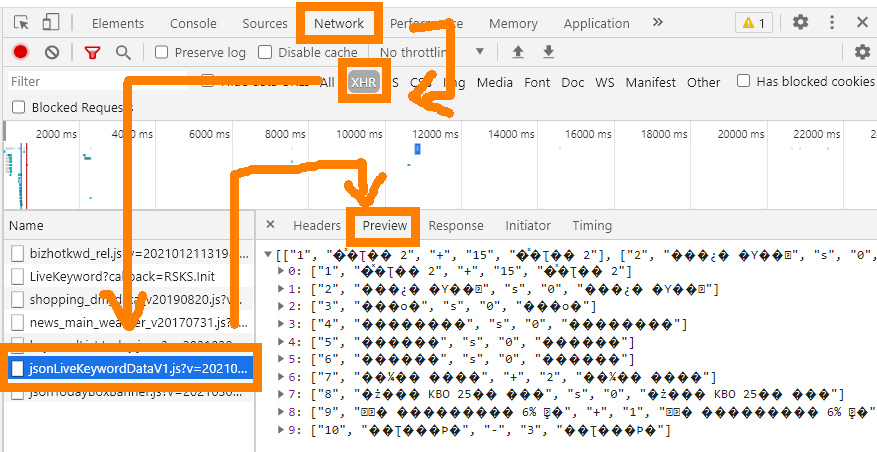

In [39]:
from IPython.display import Image
Image('./nateAjax_1.png', width = '900')

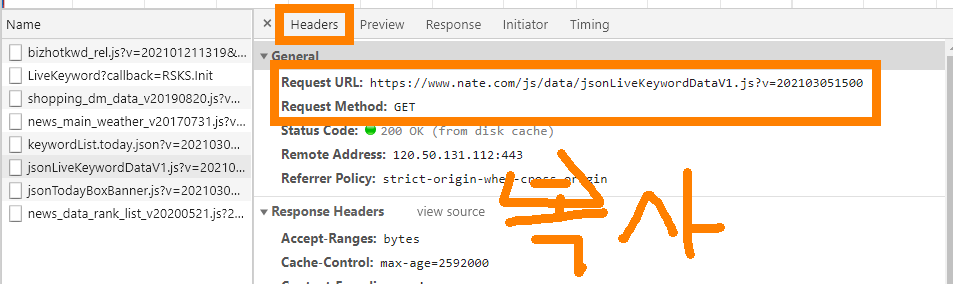

In [40]:
from IPython.display import Image
Image('./nateAjax_2.png', width = '900')

In [41]:
# 실시간 검색어가 웹 페이지에 전부 혹은 일부가 포함되어있지 않고 ajax를 이용해 받아오는 방식을 사용한다.
# Request Method가 GET 이므로 requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 받아온다.
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202103051505'
request = requests.get(targetSite)
print(request)

<Response [200]>


In [42]:
issues = request.text
print(type(issues))
print(issues)

<class 'str'>
[["1",  "미스트롯 2",  "s",  "0",  "미스트롯 2"], ["2",  "김태욱 아나운서",  "s",  "0",  "김태욱 아나운서"], ["3",  "나인우",  "s",  "0",  "나인우"], ["4",  "식약처 화이자 코로나 백신",  "n",  "0",  "식약처 화이자 코로나 백신"], ["5",  "에이프릴",  "-",  "1",  "에이프릴"], ["6",  "윤석열",  "s",  "0",  "윤석열"], ["7",  "어쩌다 사장",  "s",  "0",  "어쩌다 사장"], ["8",  "박혜수",  "-",  "3",  "박혜수"], ["9",  "로트와일러",  "+",  "1",  "로트와일러"], ["10",  "V리그 남자부 11일 재개",  "n",  "0",  "V리그 남자부 11일 재개"]]


In [43]:
# json 문자열 형태로 얻어온 실시간 이슈 키워드는 json 모듈의 loads() 메소드를 사용해서 파이썬에서 처리할 수 있는 데이터 타입으로
# 변환시켜 처리한다.
# loads() 메소드는 json 타입의 문자열이 {}를 포함하는 형태면 딕셔너리로 []만 포함하는 형태면 리스트로 시킨다.
ranks = json.loads(issues)
print(type(ranks))
print(ranks)

<class 'list'>
[['1', '미스트롯 2', 's', '0', '미스트롯 2'], ['2', '김태욱 아나운서', 's', '0', '김태욱 아나운서'], ['3', '나인우', 's', '0', '나인우'], ['4', '식약처 화이자 코로나 백신', 'n', '0', '식약처 화이자 코로나 백신'], ['5', '에이프릴', '-', '1', '에이프릴'], ['6', '윤석열', 's', '0', '윤석열'], ['7', '어쩌다 사장', 's', '0', '어쩌다 사장'], ['8', '박혜수', '-', '3', '박혜수'], ['9', '로트와일러', '+', '1', '로트와일러'], ['10', 'V리그 남자부 11일 재개', 'n', '0', 'V리그 남자부 11일 재개']]


In [44]:
for rank in ranks:
    # print(rank)

    print('{0:2d}. {1}'.format(int(rank[0]), rank[1]), end = ' ')
    if rank[2] == '+':
        print('↑' + rank[3])
    elif rank[2] == '-':
        print('↓' + rank[3])
    elif rank[2].lower() == 's':
        print('-')
    elif rank[2].lower() == 'n':
        print('new')

 1. 미스트롯 2 -
 2. 김태욱 아나운서 -
 3. 나인우 -
 4. 식약처 화이자 코로나 백신 new
 5. 에이프릴 ↓1
 6. 윤석열 -
 7. 어쩌다 사장 -
 8. 박혜수 ↓3
 9. 로트와일러 ↑1
10. V리그 남자부 11일 재개 new
